In [1]:
import math
import numpy as np
import seaborn as sns
from time import time
import pandas as pd
import pymcmcstat
import matplotlib.pyplot as plt

In [2]:
def model_magnitud(theta, data):
    mag_v_sun = -26.72

    phase_angle = data['solar_phase_angle']
    range_sat = data['range_sat']
    cross_section = theta['cross_section']
    albedo = theta['albedo'] 
    mix_coef = theta['mix_coef']

   # Change degrees to radian
    degtorad = lambda x : x*np.pi/180.

   # Definition coefficients of equation
    coe_1 = 2/(3*np.pi)
    coe_2 = 1/(4*np.pi)

    phase_angle_rad = degtorad(phase_angle)	

   
    part1 = (coe_1 *((np.pi - phase_angle_rad)*np.cos(phase_angle_rad) - np.sin(phase_angle_rad))) - coe_2
   
    mag = mag_v_sun - 2.5 * np.log10(cross_section * albedo * (mix_coef * part1) + coe_2) + 5*np.log10(range_sat)
    return mag

In [ ]:
 def residual_calc(theta, data_x, data_y):
    residual = data_y - model_magnitud(theta, data_x)
    return residual

### Read Data and create new dataframe

In [15]:
path = '/home/kero/Documents/PhD/Re-analyse/result_analyse.csv'
# path = '/home/kero/Documents/PhD/re-analyse/test.csv'
data_sat = pd.read_csv(path)

data_in = pd.DataFrame()
data_in['solar_phase_angle'] = data_sat['obs_phase_angle']
data_in['range_sat'] = data_sat['range_sat']
data_in['mag_observation'] = data_sat['mag_observation']
# data_in['solar_phase_angle'] = data_sat['SunPhaseAng']
# data_in['range_sat'] = data_sat['ObsTrailLength']
# data_in['mag_observation'] = data_sat['ObsMag']
data_in['e_mag'] = data_sat['mag_observation_e']
n = data_in.shape[0]


In [46]:
n = 10000
mean = 0.8
std_dev = 0.35
num_reps = n

cross_section_random = np.random.normal(mean, std_dev, num_reps).round(2)

In [47]:
mean = 0.55
std_dev = 0.2
num_reps = n

albedo_random = np.random.normal(mean, std_dev, num_reps).round(2)

In [48]:
mean = 0.75
std_dev = 0.12
num_reps = n


mix_coef_random = np.random.normal(mean, std_dev, num_reps).round(2)

In [7]:
def sum_squares(theta, data):

    rest = (data['mag_observation'] + data['e_mag']) + model_magnitud(theta, data)
    residual = (rest ** 2).sum(axis=0)/(rest.shape[0] - theta.shape[1])
    estimator = [residual, rest]
    
    return estimator

### Test with 3 for loops

In [ ]:
p_value = 0.83
num_simulations = 2000

good_p_value = []
mixing_coeffient_est = []
albedo_est = []
cross_section_est = []

for idx, mix_coef in enumerate(mix_coef_random):
    # Choose random inputs for the sales targets and percent to target
    # mix_coef = np.random.choice(mix_coef_random)
    print(mix_coef)
    for j in range(num_simulations):
        albedo = np.random.choice(albedo_random)
        for k in range(num_simulations):
            cross_section = np.random.choice(cross_section_random)
            # print(mix_coef, albedo, cross_section)


            df = pd.DataFrame(index=range(data_in.shape[0]), data={'mix_coef': mix_coef,
                                                            'albedo': albedo,
                                                            'cross_section' : cross_section})

            model_value = model_magnitud(df, data_in)
            
            estimador = sum_squares(df, data_in)
            # print(estimador[0])

            if estimador[0] < p_value:
                p_value = estimador[0]
                good_p_value.append(p_value)
                mixing_coeffient_est.append(mix_coef)
                albedo_est.append(albedo)
                cross_section_est.append(cross_section)

                print(estimador[0])
                print('mixing_coeffient= ', mix_coef)
                print('albedo= ', albedo)
                print('cross_section= ', cross_section)
                print('model_value= ', model_value[1])
                print('mag_obs= ', data_in.mag_observation[1])
                print('============================================')
    
result_fit = pd.DataFrame(index=range(len(mixing_coeffient_est)), data={
                                                    'p_value': good_p_value,
                                                    'mixing_coeffient_est': mixing_coeffient_est,
                                                    'albedo_est': albedo_est,
                                                    'cross_section_est' : cross_section_est})

In [21]:
mix_coef_random = [0.5, 0.75, 1.]

### Function build Markov Chains


In [ ]:


init_mix_coef = 0.75
mix_coef_std = 0.12



mix_coef_random = np.random.normal(mean, std_dev, num_reps).round(2)

In [49]:
p_value = 0.83
num_simulations = 10000

good_p_value = []
mixing_coeffient_est = []
albedo_est = []
cross_section_est = []

for i in range(num_simulations):
    # Choose random inputs for the sales targets and percent to target
    mix_coef = np.random.choice(mix_coef_random)
    albedo = np.random.choice(albedo_random)
    cross_section = np.random.choice(cross_section_random)
    # print(mix_coef, albedo, cross_section)


    df = pd.DataFrame(data={'mix_coef': mix_coef,
                            'albedo': albedo,
                            'cross_section' : cross_section},
                            index=range(data_in.shape[0]))

    model_value = model_magnitud(df, data_in)
            
    estimador = sum_squares(df, data_in)
    # print(estimador[0])

    if estimador[0] < p_value:
        p_value = estimador[0]
        good_p_value.append(p_value)
        mixing_coeffient_est.append(mix_coef)
        albedo_est.append(albedo)
        cross_section_est.append(cross_section)

        print(estimador[0])
        print('mixing_coeffient= ', mix_coef)
        print('albedo= ', albedo)
        print('cross_section= ', cross_section)
        print('model_value= ', model_value[1])
        print('mag_obs= ', data_in.mag_observation[1])
        print('============================================')
    
result_fit = pd.DataFrame(index=range(len(mixing_coeffient_est)), data={
                                                    'p_value': good_p_value,
                                                    'mixing_coeffient_est': mixing_coeffient_est,
                                                    'albedo_est': albedo_est,
                                                    'cross_section_est' : cross_section_est})



0.8284165072145211
mixing_coeffient=  0.88
albedo=  0.46
cross_section=  -0.03
model_value=  -11.468617595899508
mag_obs=  11.13610279672226
0.8186849147980393
mixing_coeffient=  1.09
albedo=  0.79
cross_section=  0.0
model_value=  -11.503791379454023
mag_obs=  11.13610279672226
0.8121264293384877
mixing_coeffient=  0.77
albedo=  0.23
cross_section=  0.09
model_value=  -11.548292606794012
mag_obs=  11.13610279672226
0.8111437868128571
mixing_coeffient=  0.45
albedo=  0.54
cross_section=  0.1
model_value=  -11.570926778026463
mag_obs=  11.13610279672226


/home/kero/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kero/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8111396302451307
mixing_coeffient=  0.6
albedo=  0.06
cross_section=  0.68
model_value=  -11.571408907275389
mag_obs=  11.13610279672226
0.8111319229253635
mixing_coeffient=  0.64
albedo=  0.58
cross_section=  0.07
model_value=  -11.575429018951821
mag_obs=  11.13610279672226
0.811129723959499
mixing_coeffient=  0.97
albedo=  0.05
cross_section=  0.53
model_value=  -11.574684390497746
mag_obs=  11.13610279672226
0.8111295855234407
mixing_coeffient=  0.65
albedo=  0.79
cross_section=  0.05
model_value=  -11.574604292505002
mag_obs=  11.13610279672226


/home/kero/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kero/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8111294922925605
mixing_coeffient=  0.53
albedo=  0.22
cross_section=  0.22
model_value=  -11.574542880041895
mag_obs=  11.13610279672226
0.8111291691435003
mixing_coeffient=  0.81
albedo=  0.45
cross_section=  0.07
model_value=  -11.574177003384138
mag_obs=  11.13610279672226


In [ ]:
0.35946426952055893
mixing_coeffient=  0.76
albedo=  0.42
cross_section=  0.6
model_value=  -11.945990905537963
mag_obs=  11.13610279672226

0.8111746154031804
mixing_coeffient=  0.5
albedo=  0.19
cross_section=  0.29
model_value=  -11.579599095073378
mag_obs=  11.13610279672226
============================================

In [37]:
type(model_value)
frame = {'model_value': model_value}
model_value_est = pd.DataFrame(frame)



In [38]:
result1 = data_in.mag_observation + model_value_est.model_value

In [39]:
result1

0      3.362974
1     -0.904130
2     -1.022973
3      0.287429
4      0.229151
         ...   
139   -2.845747
140   -2.951591
141   -3.290152
142   -3.141615
143   -2.633386
Length: 144, dtype: float64

In [40]:
data_plot = pd.concat([data_in, model_value_est*(-1)], axis=1, join='inner')
diff = data_in.mag_observation + model_value_est.model_value
data_plot['diff_mag'] = diff

In [41]:
data_plot

,solar_phase_angle,range_sat,mag_observation,e_mag,model_value,diff_mag
0,32.245458,278.637971,15.763537,1.174024,12.400564,3.362974
1,37.593041,311.628229,11.136103,0.082663,12.040233,-0.904130
2,29.029426,353.667454,10.923933,0.086001,11.946907,-1.022973
3,23.473494,920.908169,10.256544,0.056645,9.969115,0.287429
4,37.262504,1243.445283,9.272100,0.094529,9.042948,0.229151
...,...,...,...,...,...,...
139,15.112193,2021.599779,5.544144,0.037216,8.389891,-2.845747
140,18.881421,1922.613217,5.492766,0.043305,8.444357,-2.951591
141,12.155282,1732.383001,5.474251,0.042369,8.764404,-3.290152
142,22.562450,1834.766768,5.345930,0.032044,8.487544,-3.141615


<AxesSubplot:xlabel='solar_phase_angle', ylabel='mag_observation'>

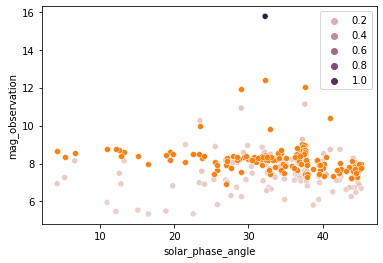

In [42]:
sns.scatterplot(data=data_plot, x="solar_phase_angle", y="mag_observation", hue="e_mag")
sns.scatterplot(data=data_plot, x="solar_phase_angle", y="model_value", markers='s')

<AxesSubplot:xlabel='solar_phase_angle', ylabel='mag_observation'>

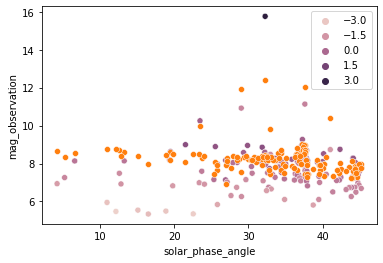

In [43]:
sns.scatterplot(data=data_plot, x="solar_phase_angle", y="mag_observation", hue="diff_mag")
sns.scatterplot(data=data_plot, x="solar_phase_angle", y="model_value", markers='s')

In [44]:
result_fit

,p_value,mixing_coeffient_est,albedo_est,cross_section_est
0,0.828280,0.98,0.25,0.28
1,0.814494,0.76,0.36,0.03
2,0.812597,0.75,0.02,0.93
3,0.811760,0.77,0.58,0.04
4,0.811508,1.01,0.04,0.78
5,0.811269,0.80,0.52,0.07
6,0.811148,0.69,0.25,0.14
7,0.811139,0.89,0.27,0.11
8,0.811132,0.77,0.27,0.12
9,0.811129,0.66,0.04,0.96


<AxesSubplot:xlabel='mixing_coeffient_est', ylabel='p_value'>

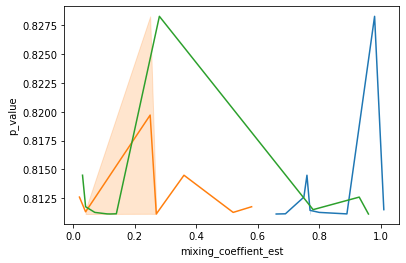

In [45]:
sns.lineplot(data=result_fit, x="mixing_coeffient_est", y="p_value", markers=True)
sns.lineplot(data=result_fit, x="albedo_est", y="p_value", markers=True)
sns.lineplot(data=result_fit, x="cross_section_est", y="p_value", markers=True)